2024년 7월 기준 인구 데이터를 가지고, 여러가지 데이터 분석과 시각화를 해봅시다.

In [ ]:
import csv
import matplotlib.pyplot as plt

file = open('Report.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

popList = []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]
        for i in row[3:104] : # 남녀 연령별 인구 (0세 ~ 100세 이상)
            popList.append(int(i.replace(',', '')))

file.close()
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 인구 분포")
plt.plot(range(101), popList)
plt.show()

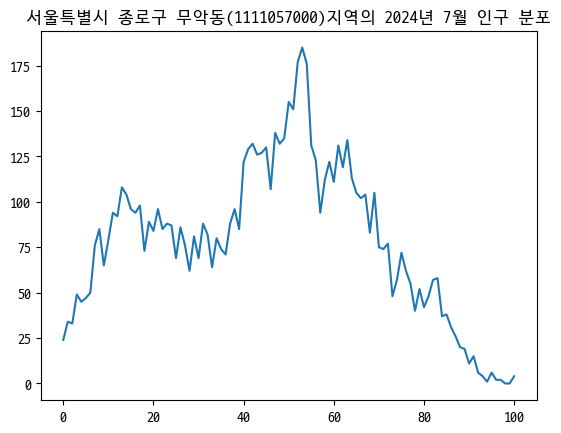

In [2]:
import csv
import matplotlib.pyplot as plt

file = open('population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

popList = []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]
        for i in row[3:104] : # 남녀 연령별 인구 (0세 ~ 100세 이상)
            popList.append(int(i.replace(',', '')))

file.close()
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 인구 분포")
plt.plot(range(101), popList)
plt.show()

위 코드를 응용하여 서울시 강서구 지역의 남자(blue), 여자(pink) 분포도를 각각 그리세요
1150000000

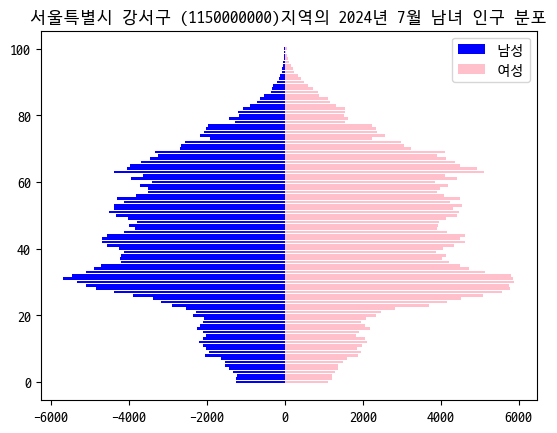

In [3]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

maleList = []
femaleList= []
addrName = ''

code = input('조회하시길 원하는 지역의 코드를 입력하세요')

for row in data :
    if code in row[0] :
        addrName = row[0]

        for i in range(101) :
            maleList.append(int(row[i+106].replace(',', ''))*-1)
            femaleList.append(int(row[i + 209].replace(',', '')))

file.close()

plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + "지역의 2024년 7월 남녀 인구 분포")

plt.barh(range(101), maleList, color='blue', label='남성')
plt.barh(range(101), femaleList, color='pink', label='여성')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.legend()
plt.show()

In [ ]:
네, 맞습니다. 일반적인 바 차트에서 x축의 0을 기준으로 왼쪽과 오른쪽 모두에서 양수로 보이게 하려면, 기본적으로 barh 함수의 데이터 변환만으로는 완벽히 해결할 수 없습니다. 그러나, x축을 왼쪽과 오른쪽 모두 양수로 나타내는 방법이 몇 가지 있습니다.

데이터를 수동으로 조정하여 양쪽 모두에서 양수로 보이게 하는 방법:

데이터의 시각화를 조금 더 복잡하게 조정하여 해결할 수 있습니다. 남성 데이터를 음수로 표시하고 여성 데이터를 양수로 표시하되, x축의 표시 형식을 변경하여 - 기호를 숨기고 두 데이터 세트를 모두 양수로 보이도록 할 수 있습니다.
X축의 눈금을 조정하여 마이너스 기호를 숨기기:

축의 레이블을 수동으로 조정하여 - 기호가 표시되지 않도록 하는 방법입니다. Matplotlib의 FuncFormatter를 이용하여 사용자 정의 포맷터를 만들 수 있습니다.
아래는 FuncFormatter를 사용하여 x축의 레이블에서 마이너스 기호를 숨기는 예제입니다:

변경 사항 설명
FuncFormatter 사용:

FuncFormatter를 사용하여 x축의 레이블을 사용자 정의 포맷으로 설정합니다. 이 포맷은 음수 값을 양수로 표시하지만, 원래 데이터는 음수로 유지합니다.
포맷 함수:

format_func 함수는 음수 값을 양수로 변환하여 표시합니다. 이 함수는 음수 값을 변환할 때 - 기호를 숨깁니다.
이 방법을 사용하면 시각적으로 왼쪽과 오른쪽 모두에서 양수로 표시되지만, 실제 데이터는 음수로 유지하여 원래의 데이터 분포를 유지할 수 있습니다.

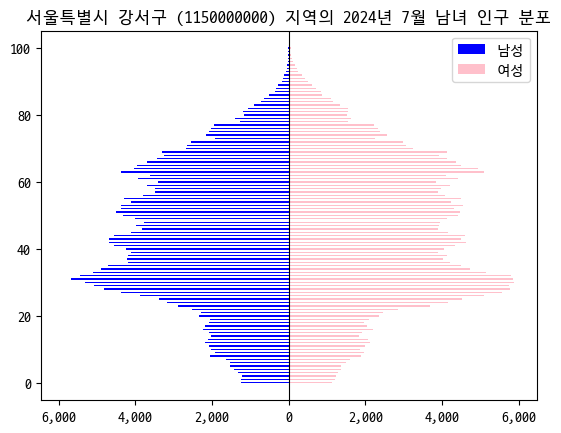

In [2]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 데이터 파일 열기
with open('202407_population.csv', 'r', encoding='utf-8') as file:
    data = csv.reader(file, delimiter=',')

    maleList = []
    femaleList = []
    addrName = ''

    # 사용자로부터 지역 코드 입력 받기
    code = input('조회하시길 원하는 지역의 코드를 입력하세요: ')

    # 데이터에서 해당 지역 코드 찾기
    for row in data:
        if code in row[0]:
            addrName = row[0]

            # 남성과 여성 인구 데이터를 리스트에 저장
            for i in range(101):
                maleList.append(int(row[i+106].replace(',', '')))
                femaleList.append(int(row[i+209].replace(',', '')))
            break  # 찾은 지역 데이터가 있으면 루프 종료

# 시각화 설정
plt.rcParams['font.family'] = 'D2Coding'
plt.title(addrName + " 지역의 2024년 7월 남녀 인구 분포")

# 막대 차트를 각각 남성과 여성 데이터로 생성
indices = range(101)
plt.barh(indices, [-m for m in maleList], color='blue', label='남성', align='center', height=0.4)  # 남성 데이터를 음수로 변환
plt.barh(indices, femaleList, color='pink', label='여성', align='center', height=0.4)  # 여성 데이터는 그대로

# x축의 범위 조정
max_value = max(max(maleList), max(femaleList))
plt.xlim(-max_value * 1.1, max_value * 1.1)  # x축의 범위를 양쪽 방향으로 확장

# x축 포맷터 설정 (음수 기호 숨기기)
def format_func(value, tick_number):
    if value < 0:
        return f'{-value:,.0f}'
    return f'{value:,.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

# x=0에 수직선 추가
plt.axvline(0, color='black', linewidth=0.8)  # x=0에 수직선 추가

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.legend()
plt.show()


문) 제주도에는 과연 여자가 많을까? 제주도 남녀 인구 비율을 파이 차트로 시각화 해보자
5000000000

336330 335738


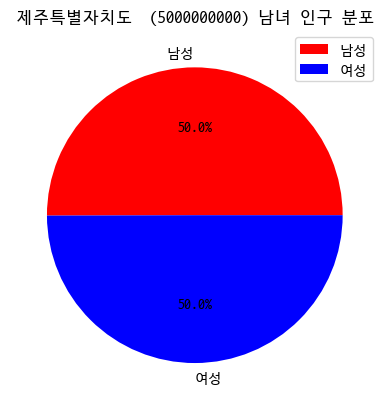

In [20]:
import csv
import matplotlib.pyplot as plt

file = open('202407_population.csv', 'r', encoding='utf-8')
data = csv.reader(file, delimiter=',')

jejuPopulation = []
addrName = ''


for row in data :
    if '5000000000' in row[0] :
        addrName = row[0]
        jejuPopulation.append(int(row[104].replace(',', '')))
        jejuPopulation.append(int(row[207].replace(',', '')))

file.close()

plt.rc('font', family='D2Coding')
plt.title(addrName + " 남녀 인구 분포")
label = ['남성', '여성']
colors=['red','blue'] 

print(maleList, femaleList)
plt.pie(jejuPopulation, labels= label, autopct='%.1f%%' , colors=colors) 

plt.legend()
plt.show()


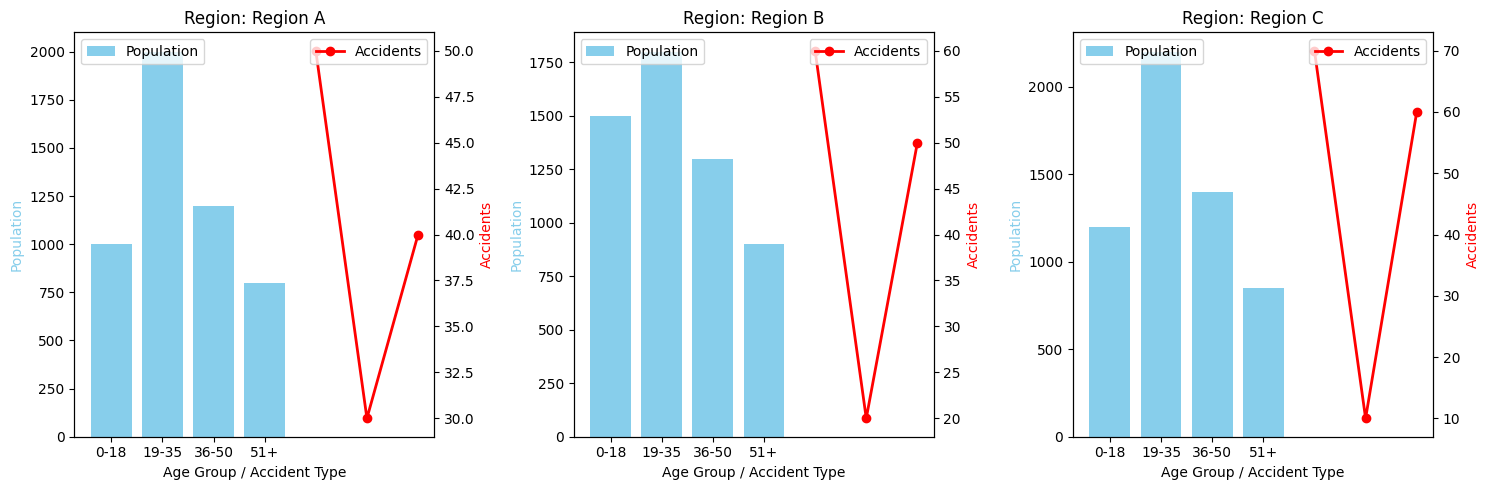

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 가상의 인구 분포 데이터 (지역별 나이대)
population_data = pd.DataFrame({
    'region': ['Region A', 'Region B', 'Region C'],
    '0-18': [1000, 1500, 1200],
    '19-35': [2000, 1800, 2200],
    '36-50': [1200, 1300, 1400],
    '51+': [800, 900, 850]
})

# 가상의 사고 데이터 (연령대별 사고 발생 수)
accident_data = pd.DataFrame({
    'region': ['Region A', 'Region B', 'Region C'],
    'Car': [50, 60, 70],
    'Bike': [30, 20, 10],
    'Pedestrian': [40, 50, 60]
})

# 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 각 지역별 이중 Y축 차트 그리기
for i, region in enumerate(population_data['region']):
    ax = axes[i]
    
    # 인구 데이터 준비
    pop_region = population_data[population_data['region'] == region].drop(columns='region').T
    pop_region.columns = ['Population']
    
    # 사고 데이터 준비
    acc_region = accident_data[accident_data['region'] == region].drop(columns='region').T
    acc_region.columns = ['Accidents']
    
    # X축 레이블
    age_groups = ['0-18', '19-35', '36-50', '51+']
    accident_types = ['Car', 'Bike', 'Pedestrian']
    
    # 막대 그래프 (왼쪽 Y축 - 인구 수)
    ax.bar(age_groups, pop_region['Population'], color="skyblue", label="Population")
    
    # 오른쪽 Y축을 생성하여 선 그래프 (사고 수) 추가
    ax2 = ax.twinx()
    ax2.plot(accident_types, acc_region['Accidents'], color="red", marker="o", label="Accidents", linewidth=2)
    
    # 축 레이블 및 제목 설정
    ax.set_title(f"Region: {region}")
    ax.set_xlabel("Age Group / Accident Type")
    ax.set_ylabel("Population", color="skyblue")
    ax2.set_ylabel("Accidents", color="red")
    
    # X축 레이블을 두 줄로 설정 (아래: 연령대, 위: 사고 유형)
    ax.set_xticks(np.arange(len(age_groups)))
    ax.set_xticklabels(age_groups)
    
    # 범례 추가
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# 레이아웃 조정 및 차트 출력
plt.tight_layout()
plt.show()


In [ ]:
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
from io import BytesIO
import base64

# 서울시 구별 GeoJSON 파일 로드
geo_data = gpd.read_file('seoul_districts.geojson')

# 가상의 인구 및 사고 데이터 생성 (구별)
population_data = pd.DataFrame({
    'district': ['Gangnam-gu', 'Seocho-gu', 'Jongno-gu', 'Guro-gu', 'Yeongdeungpo-gu'],
    '0-18': [12000, 15000, 11000, 13000, 9000],
    '19-35': [20000, 22000, 18000, 21000, 15000],
    '36-50': [15000, 17000, 14000, 16000, 12000],
    '51+': [10000, 13000, 9000, 12000, 8000],
    'most_common_accident': ['Car', 'Bike', 'Pedestrian', 'Car', 'Bike']
})

# 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 히스토그램과 막대 그래프를 구별로 표시하기 위한 함수
def plot_histogram_and_bar(district):
    # 선택된 구의 인구 및 사고 데이터 가져오기
    pop_data = population_data[population_data['district'] == district]
    age_groups = ['0-18', '19-35', '36-50', '51+']
    accidents = ['Car', 'Bike', 'Pedestrian']
    
    # 히스토그램 생성
    fig, ax = plt.subplots()
    ax.bar(age_groups, pop_data[age_groups].values[0], color='skyblue', label='Population')
    ax.set_title(f'{district} Population Distribution')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Population')
    
    # 막대 그래프 생성
    ax2 = ax.twinx()
    most_common_accident = pop_data['most_common_accident'].values[0]
    accident_count = [100, 70, 50]  # 가상의 사고 발생 수 데이터
    ax2.bar(accidents, accident_count, color='red', alpha=0.5, label='Accidents')
    ax2.set_ylabel('Accidents')
    
    # 그래프를 이미지로 변환하여 지도에 추가
    img = BytesIO()
    plt.savefig(img, format='png')
    plt.close(fig)
    img.seek(0)
    img_base64 = base64.b64encode(img.getvalue()).decode()
    return f'<img src="data:image/png;base64,{img_base64}"/>'

# 각 구에 대한 히스토그램 및 막대 그래프를 지도에 추가
for _, row in geo_data.iterrows():
    district_name = row['name']
    
    if district_name in population_data['district'].values:
        html = plot_histogram_and_bar(district_name)
        iframe = folium.IFrame(html, width=400, height=300)
        popup = folium.Popup(iframe, max_width=400)
        folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x], popup=popup).add_to(seoul_map)

# 지도 출력
seoul_map.save('seoul_districts_population_accidents.html')


In [2]:
import matplotlib.font_manager as fm

# 설치된 폰트 목록 조회
font_list = [f.name for f in fm.fontManager.ttflist]
for font in font_list:
    print(font)

DejaVu Sans
DejaVu Serif
STIXGeneral
DejaVu Sans Mono
cmr10
DejaVu Serif
STIXNonUnicode
DejaVu Sans Mono
STIXNonUnicode
DejaVu Sans
DejaVu Serif
DejaVu Sans Mono
STIXSizeTwoSym
DejaVu Sans
STIXSizeFiveSym
cmmi10
STIXSizeFourSym
DejaVu Serif Display
DejaVu Sans Display
STIXGeneral
STIXNonUnicode
STIXSizeOneSym
cmss10
STIXSizeOneSym
STIXSizeThreeSym
DejaVu Sans
DejaVu Sans Mono
STIXSizeFourSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXNonUnicode
cmex10
cmb10
cmsy10
STIXGeneral
cmtt10
DejaVu Serif
STIXGeneral
Consolas
Palatino Linotype
KoPubDotum Light
YES Gothic
HCR Batang ExtB
Malgun Gothic
Microsoft Himalaya
MV Boli
Ebrima
Book Antiqua
MingLiU-ExtB
Segoe UI
Courier New
Constantia
Franklin Gothic Medium
HYSinMyeongJo-Medium
Sitka Small
Calibri
Garamond
Microsoft JhengHei
NanumBarunpen
Georgia
Cambria
Microsoft New Tai Lue
Arial
Arial
Century Gothic
Book Antiqua
HyhwpEQ
Myanmar Text
Consolas
Hancom Gothic
Microsoft YaHei
Bookman Old Style
HYHeadLine-Medium
Microsoft JhengHei
Han Santteut Dotum

In [13]:
# CSV 파일 읽기 (low_memory=False 옵션 추가)
file_path = 'population.csv'
data = pd.read_csv(file_path, low_memory=False)

# 서울특별시 구 이름을 저장할 리스트 초기화
district = []

# '행정구역' 열에서 각 행을 순회하며 서울특별시에 해당하는 구 이름만 추출
for row in data['행정구역']:
    parts = row.split()  # 공백으로 문자열을 분리
    
    # 항목이 2개 이상이고, 첫 번째 항목이 '서울특별시'인 경우만 선택
    if len(parts) > 1 and parts[0] == "서울특별시":  
        dis = parts[1]  # 두 번째 항목이 구 이름에 해당함 ('종로구' 같은 경우)
        
        # '구'라는 단어가 포함된 항목만 필터링하여 districts 리스트에 추가
        if "구" in dis:  
            district.append(dis)

# 중복 제거
district = list(set(district))

# 결과 출력
print(district)


['성동구', '영등포구', '종로구', '노원구', '양천구', '강서구', '광진구', '강북구', '성북구', '구로구', '마포구', '중랑구', '동작구', '송파구', '동대문구', '서대문구', '강남구', '도봉구', '관악구', '은평구', '용산구', '중구', '서초구', '강동구', '금천구']


In [45]:
import pandas as pd

# CSV 파일 읽기 (low_memory=False 옵션 추가)
file_path = 'population.csv'
data = pd.read_csv(file_path, low_memory=False)

# '서울특별시 구'만 추출, '구' 이후에 다른 정보가 있으면 제외
data_filtered = data[data['행정구역'].str.contains(r'서울특별시 \S+구 \(\d{10}\)', na=False)]

# 구간에 따른 나이 계산을 위한 함수
def sum_age_group(row, start, end):
    return sum([pd.to_numeric(str(row[f'2024년07월_계_{i}세']).replace(",", ""), errors='coerce') for i in range(start, end+1)])

# 구별로 나이를 구간화한 총 인구수를 저장할 딕셔너리 초기화
age_group_population = {
    "0~10": [],
    "11~20": [],
    "21~30": [],
    "31~40": [],
    "41~50": [],
    "51~60": [],
    "61~70": [],
    "71~80": [],
    "81~90": [],
    "91+": []
}

# '행정구역' 열에서 각 행을 순회하며 연령 구간별 인구수를 계산
for idx, row in data_filtered.iterrows():
    age_group_population["0~10"].append(int(sum_age_group(row, 0, 10)))
    age_group_population["11~20"].append(int(sum_age_group(row, 11, 20)))
    age_group_population["21~30"].append(int(sum_age_group(row, 21, 30)))
    age_group_population["31~40"].append(int(sum_age_group(row, 31, 40)))
    age_group_population["41~50"].append(int(sum_age_group(row, 41, 50)))
    age_group_population["51~60"].append(int(sum_age_group(row, 51, 60)))
    age_group_population["61~70"].append(int(sum_age_group(row, 61, 70)))
    age_group_population["71~80"].append(int(sum_age_group(row, 71, 80)))
    age_group_population["81~90"].append(int(sum_age_group(row, 81, 90)))
    
    # '100세 이상' 인구는 별도로 처리
    over_90 = int(sum_age_group(row, 91, 99))
    over_90 += int(pd.to_numeric(str(row['2024년07월_계_100세 이상']).replace(",", ""), errors='coerce'))
    age_group_population["91+"].append(over_90)

# 결과 출력 (np.int64 없이 일반 정수로 출력)
for age_range, population in age_group_population.items():
    print(f"{age_range}: {population}")


0~10: [6464, 6022, 11701, 18103, 16515, 19720, 20518, 26131, 12390, 15375, 29040, 25916, 19018, 22271, 28598, 33582, 24201, 10460, 23644, 21633, 17673, 31003, 39189, 47377, 34517]
11~20: [10178, 6439, 13722, 18712, 24642, 24510, 24404, 36985, 19772, 22809, 48519, 36005, 23144, 27370, 47190, 41957, 28218, 13098, 23390, 27160, 27028, 44682, 63250, 57214, 39460]
21~30: [22389, 18627, 30858, 42178, 61793, 58436, 52487, 64961, 38458, 37954, 65429, 64170, 49727, 62173, 52364, 83534, 53010, 37914, 61990, 66711, 115116, 51225, 70622, 88567, 59197]
31~40: [18944, 20718, 35550, 45598, 52457, 48714, 56421, 55466, 33753, 37028, 60674, 64901, 43968, 62416, 53007, 93160, 59936, 36116, 69283, 58311, 82132, 57296, 81094, 104392, 69448]
41~50: [19223, 16609, 29925, 40279, 47776, 48263, 53048, 63389, 39807, 42603, 75864, 69983, 43912, 56377, 73207, 85157, 57796, 29260, 53000, 54070, 60960, 72571, 102609, 105302, 75060]
51~60: [23564, 18991, 32851, 43677, 52202, 52055, 64431, 69642, 49751, 53861, 84268, 

In [44]:
data_string = "[np.int64(6464), np.int64(6022), np.int64(11701), np.int64(18103), np.int64(16515), np.int64(19720), np.int64(20518), np.int64(26131), np.int64(12390), np.int64(15375), np.int64(29040), np.int64(25916), np.int64(19018), np.int64(22271), np.int64(28598), np.int64(33582), np.int64(24201), np.int64(10460), np.int64(23644), np.int64(21633), np.int64(17673), np.int64(31003), np.int64(39189), np.int64(47377), np.int64(34517)]"

# ',' 기준으로 나누기
data_list = data_string.split(',')
print(f"데이터 개수: {len(data_list)}")

데이터 개수: 25


In [102]:
import pandas as pd

# 데이터 불러오기: 'Report_edit.csv' 파일에서 데이터를 읽어옴
file_path = 'Report_edit.csv'
data = pd.read_csv(file_path)

# 처리할 사고 유형들: 분석할 사고 유형들의 리스트를 정의
# 예시: '횡단중', '차도통행중', '길가장자리구역통행중' 등의 사고 유형들이 포함됨
accident_types = ['횡단중', '차도통행중', '길가장자리구역통행중', '보도통행중', '충돌', '추돌', '공작물충돌', '도로이탈', '전도전복']

# 시군구별로 사고 유형 합계를 계산하는 함수 정의
def aggregate_accident_data_by_region(region):
    # 1. '서울' 지역에 해당하는 데이터만 필터링함
    # '시도'가 '서울'이고, '시군구'가 해당 지역(region)이며, '사고년도'가 '사고[건]'인 데이터만 선택
    # 이 과정은 서울의 각 지역에서 발생한 사고 건수를 집계하기 위한 전처리 과정임
    region_data = data[(data['시도'] == '서울') & (data['시군구'] == region) & (data['사고년도'] == '사고[건]')]
    
    # 2. 사고 유형별로 데이터를 집계
    accident_sums = []
    for accident_type in accident_types:
        # 각 사고 유형에 해당하는 열(column)을 찾음
        # 예시: '횡단중' 사고에 해당하는 열들을 선택 (예: '횡단중 - 사고건수', '횡단중 - 사망자수' 등)
        accident_columns = [col for col in region_data.columns if accident_type in col]
        
        # 3. 선택된 열들의 값을 모두 더함
        # '-'는 0으로 대체하고, 쉼표는 제거한 후 float 타입으로 변환하여 합산
        # 예시: 종로구의 '횡단중' 사고 합계가 393건이라면, 이 값이 accident_sum으로 들어감
        accident_sum = region_data[accident_columns].replace('-', 0).astype(str).replace({',': ''}, regex=True).astype(float).sum().sum()
        
        # 4. 소수점을 제거하여 정수로 변환
        # 예시: accident_sum이 393.0이면, 이를 393으로 변환하여 accident_sums 리스트에 추가
        accident_sums.append(int(accident_sum))
    
    # 5. 각 지역별 사고 유형 합계 리스트 반환
    return accident_sums

# 6. 서울에 해당하는 시군구(region)의 리스트를 추출
# 예시: ['종로구', '마포구', '강서구', '구로구', '영등포구', ...]
regions = data[data['시도'] == '서울']['시군구'].unique()

# 7. 각 시군구에 대해 사고 유형별 합계를 계산하고 딕셔너리로 저장
# key는 시군구 이름, value는 해당 시군구의 사고 유형별 합계 리스트
accident_summary = {region: aggregate_accident_data_by_region(region) for region in regions}

# 8. 결과를 데이터프레임으로 변환하여 보기 쉽게 출력
# 행은 시군구, 열은 사고 유형이 되고, 각 셀은 해당 시군구에서 발생한 사고 유형별 합계가 됨
# 예시: 종로구의 횡단중 사고 합계가 393건이라면, 데이터프레임에서 '종로구' 행과 '횡단중' 열에 393이 표시됨
accident_summary_df = pd.DataFrame.from_dict(accident_summary, orient='index', columns=accident_types)

# 9. 데이터프레임 출력: 시군구별 사고 유형별 합계가 출력됨
print(accident_summary_df)


      횡단중  차도통행중  길가장자리구역통행중  보도통행중    충돌    추돌  공작물충돌  도로이탈  전도전복
종로구   393    198          81    107  2043   687     47     3    28
마포구   399    141          52    111  2116  1082     29     0    14
강서구   604    184          96    149  2640  1171     34     2    17
구로구   530    134         101    151  2422   966     43     0    17
영등포구  716    204         114    168  4412  1664     61     1    37
동작구   462    196          91    128  2435   966     40     0    11
관악구   442    186         101     97  2172   878     22     1    17
강남구   833    244         399    335  5246  3222     53     2    23
강동구   538    144          88    136  2291   963     23     3     0
송파구   753    298         166    249  5529  2159     66     1    45
서초구   577    244         113    189  4168  2048     55     4    21
중구    391    128          48     85  2115   625     23     0    19
양천구   493     93          50    110  1906   902     23     1     8
중랑구   662    125         122    120  2403   913     56     2  